# Reflection in 2D

$$
\operatorname{Ref}_l(v) = 2\frac{v \cdot l}{l \cdot l}l - v
$$

https://en.wikipedia.org/wiki/Reflection_(mathematics)


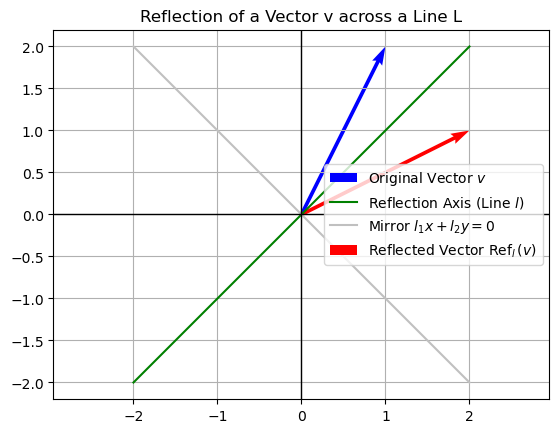

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Define the original vector v and the line vector l
v = np.array([1, 2])
l = np.array([1, 1])

# Compute the reflection of v across the line l
ref = 2 * (v.T @ l) / (l.T @ l) * l - v

# Define the x values for the line plot
x = np.linspace(-2, 2, 1000)
line = l[1] / l[0] * x
mirror = -l[0]/l[1]*x

# Create the plot
fig, ax = plt.subplots()

# Plot the original vector v using an arrow
ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Original Vector $v$')

# Plot the line of reflection (l)
ax.plot(x, line, color='green', label='Reflection Axis (Line $l$)')
ax.plot(x, mirror, color='silver', label='Mirror $l_1 x + l_2 y = 0$')

# Plot the reflected vector ref using an arrow
ax.quiver(0, 0, ref[0], ref[1], angles='xy', scale_units='xy', scale=1, color='red', label='Reflected Vector $\\operatorname{Ref}_l(v)$')

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
ax.axis('equal')
ax.grid(True)
ax.legend()
ax.set_title("Reflection of a Vector v across a Line L")
plt.show()


## 2D Reflection matrix

$$
P = \begin{bmatrix} 
\cos(2t) & \sin(2t) \\ 
\sin(2t) & -\cos(2t)
\end{bmatrix}
$$

* Reflection axis: $(cos t, sin t)$
* https://en.wikipedia.org/wiki/Rotations_and_reflections_in_two_dimensions

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

# Function to plot vectors and their transformation
def plot_vectors(x, y, t):
    # Define the reflection matrix P
    cos2t = np.cos(2*t)
    sin2t = np.sin(2*t)
    P = np.array([[cos2t, sin2t], [sin2t, -cos2t]])

    # Original vector [x, y]
    original_vector = np.array([x, y])

    # Transformed vector P[x, y]
    transformed_vector = np.dot(P, original_vector)

    w = np.linspace(-10, 10, 1000)
    slope = np.sin(t)/np.cos(t)
    v = w * slope

    # Create the plot
    plt.figure(figsize=(6, 6))
    plt.plot(w,v, label=f"y={slope:.4f}x")
    
    # Plot the original vector
    plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, color='blue', label='Original vector $v$')
    
    # Plot the transformed vector
    plt.quiver(0, 0, transformed_vector[0], transformed_vector[1], angles='xy', scale_units='xy', scale=1, color='red', label='Transformed vector $Pv$')
    
    # Set limits for the plot
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    
    # Add labels and title
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.title(r"Original and Reflected Vectors around $y = \frac{\sin t}{\cos t} x$" +  f"(t={t:.2f} rad)")


    plt.show()


def reset_parameters(b):
    x_slider.value = 2.0
    y_slider.value = 3.0
    t_slider.value = np.pi/4

# reset button
reset_button = widgets.Button(description="Reset", layout=widgets.Layout(width="400px"))
reset_button.on_click(reset_parameters)
display(reset_button)


# Interactive widgets for vector [x, y] and angle t
x_slider = widgets.FloatSlider(value=2.0, min=-5.0, max=5.0, step=0.1, description='x:')
y_slider = widgets.FloatSlider(value=3.0, min=-5.0, max=5.0, step=0.1, description='y:')
t_slider = widgets.FloatSlider(value=np.pi/4, min=0, max=2*np.pi, step=np.pi/8, description='t[rad]:')

# Display the interactive plot
interact(plot_vectors, x=x_slider, y=y_slider, t=t_slider)


Button(description='Reset', layout=Layout(width='400px'), style=ButtonStyle())

interactive(children=(FloatSlider(value=2.0, description='x:', max=5.0, min=-5.0), FloatSlider(value=3.0, desc…

<function __main__.plot_vectors(x, y, t)>

## Reflection matrix in 3D

$$
R = I - 2n n^T
$$


* $n=(a,b,c)/\sqrt{a^2+b^2+c^2})$ is the unit normal vector of the plane $P$
* P: $ax+by+cz = 0$

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, FloatSlider, widgets

# Define the grid for x and y
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
x, y = np.meshgrid(x, y)

n_dim = 3

def plot_3d(angle_x, angle_y, v1=5, v2=5, v3=5, a=1, b=1, c=1):
    normal_vec = np.ones(n_dim)/np.sqrt(n_dim)

    # Correct reflection matrix
    R = np.eye(n_dim) - 2 * np.outer(normal_vec, normal_vec)
    
    # Define the plane ax +by +cz=0
    z = (-a*x - b*y)/c

    v = np.array([v1, v2, v3])
    Rv = R @ v  # Calculate the reflection of v
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the plane
    ax.plot_surface(x, y, z, color='lightblue', alpha=0.5, edgecolor='none')
    
    # Plot the vector (v) and its reflection (Rv)
    ax.quiver(0, 0, 0, v[0], v[1], v[2], color='red', linewidth=2, label=f"Original Vector v({v[0]:.2f}, {v[1]:.2f}, {v[2]:.2f})")
    ax.quiver(0, 0, 0, Rv[0], Rv[1], Rv[2], color='blue', linewidth=2, label=f"Reflected Vector Rv({Rv[0]:.2f}, {Rv[1]:.2f}, {Rv[2]:.2f})")
    
    # Set labels and title
    ax.set_title(f"Original v and reflected vector Rv w.r.t the plane:{a:.2f}x+{b:.2f}y+{c:.2f}z=0", fontsize=14)
    ax.set_xlabel("x-axis")
    ax.set_ylabel("y-axis")
    ax.set_zlabel("z-axis")
    
    # Scatter points for the vectors
    ax.scatter(Rv[0], Rv[1], Rv[2], color="blue", label=f"Reflected Rv")

    # Set viewing angle
    ax.view_init(elev=angle_x, azim=angle_y)
    ax.axis('equal')
    
    ax.legend()
    plt.show()

# Create sliders for the various parameters
elev_angle_slider = FloatSlider(value=30, min=0, max=90, step=5, description='Elev Angle')
azim_angle_slider = FloatSlider(value=100, min=0, max=360, step=10, description='Azim Angle')

v1_slider = FloatSlider(value=5, min=-10, max=10, step=0.1, description='v1')
v2_slider = FloatSlider(value=5, min=-10, max=10, step=0.1, description='v2')
v3_slider = FloatSlider(value=5, min=-10, max=10, step=0.1, description='v3')

a_slider = FloatSlider(value=1, min=-5, max=5, step=0.1, description='a')
b_slider = FloatSlider(value=1, min=-5, max=5, step=0.1, description='b')
c_slider = FloatSlider(value=1, min=-5, max=5, step=0.1, description='c')

# Arrange the sliders in the desired layout using HBox and VBox
sliders_layout = widgets.VBox([
    widgets.HBox([elev_angle_slider, azim_angle_slider]),
    widgets.HBox([v1_slider, v2_slider, v3_slider]),
    widgets.HBox([a_slider, b_slider, c_slider])
])

# Create the reset function
def reset_parameters(b):
    # Reset all sliders to their default values
    elev_angle_slider.value = 30
    azim_angle_slider.value = 100
    v1_slider.value = 5
    v2_slider.value = 5
    v3_slider.value = 5
    a_slider.value = 1
    b_slider.value = 1
    c_slider.value = 1

# Create the reset button
reset_button = widgets.Button(description="Reset")

# Link the reset function to the button's click event
reset_button.on_click(reset_parameters)

# Layout with sliders and reset button
ui = widgets.VBox([
    sliders_layout,  
    reset_button  
])

# Use interact to call the plot function with the sliders
interact(
    plot_3d,
    angle_x=elev_angle_slider,
    angle_y=azim_angle_slider,
    v1=v1_slider,
    v2=v2_slider,
    v3=v3_slider,
    a=a_slider,
    b=b_slider,
    c=c_slider
)

# Display the UI
display(ui)


interactive(children=(FloatSlider(value=30.0, description='Elev Angle', max=90.0, step=5.0), FloatSlider(value…